### Geo / radar coordinates conversion using MintPy functions ###
You can use the "coordinate" object in MintPy to conver the coordinates between radar and geo precisely, i.e. y/x --> lat/lon, or lat/lon --> y/x. Here y and x are the row and column number of the pixel(s) of interest.

For file in geo coordinates, the conversion is simply to tranform the pixel size from "1" in pixel number to Y/X_STEP in degree. For file in radar coordinates, "coordinate" object uses the lookup table file generated by InSAR processor to search the corresponding area and uses the mean value/coordinate of the area.

Below shows the usage with an example data pre-processed by ISCE-2.2. You can turn on the "debug_mode" to see how the function searches the corresponding Y/X value given lat/lon.

In [1]:
# Usage example
%matplotlib inline
import os
from mintpy.utils import readfile, utils as ut

# lookup table file
proj_dir = os.path.expanduser('~/insarlab/Galapagos/GalapagosSenDT128/mintpy')
geom_file = os.path.join(proj_dir, 'inputs/geometryRadar.h5')   # for Gamma/ROI_PAC, it's geometryGeo.h5
vel_file  = os.path.join(proj_dir, 'velocity.h5')               # file of interest, it's can be in radar or geo coordinate
#vel_file  = os.path.join(proj_dir, 'geo/geo_velocity.h5')      # file of interest, it's can be in radar or geo coordinate

# initiate coordinate object
atr = readfile.read_attribute(vel_file)
coord = ut.coordinate(atr, lookup_file=geom_file)
coord.open()

# row/col number --> lat/lon in degree (radar to geo)
y1, x1 = 1744, 1264
lat1, lon1 = coord.radar2geo(y1, x1)[0:2]
print('input         radar coordinate in (y, x): ({}, {})'.format(y1, x1))
print('corresponding   geo coordinate in (lat, lon): ({}, {})'.format(lat1, lon1))

# lat/lon in degree --> row/col number (geo to radar)
lat2, lon2 = lat1, lon1
y2, x2 = coord.geo2radar(lat2, lon2)[0:2]
print('input           geo coordinate in (lat, lon): ({}, {})'.format(lat2, lon2))
print('corresponding radar coordinate in (y, x): ({}, {})'.format(y2, x2))

input         radar coordinate in (y, x): (1744, 1264)
corresponding   geo coordinate in (lat, lon): (-0.8658891916275024, -91.56937408447266)
input           geo coordinate in (lat, lon): (-0.8658891916275024, -91.56937408447266)
corresponding radar coordinate in (y, x): (1744, 1264)


Debug mode is ON.
Show the row/col number searching result.


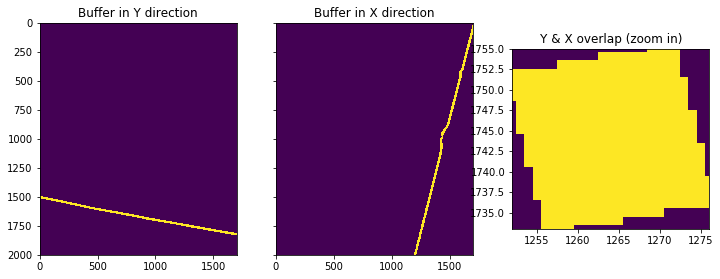

(1744, 1264)

In [2]:
# Plot to show how it works
coord.geo2radar(lat2, lon2, debug_mode=True)[0:2]